In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving adult_with_headers.csv to adult_with_headers.csv


# Data Exploration and Preprocessing

In [3]:
Ad= pd.read_csv("adult_with_headers.csv")
Ad.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Ad.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
Ad.replace('?', np.NaN, inplace = True)
Ad.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
Ad.fillna(method = 'ffill', inplace = True)

<ipython-input-6-f23229716002>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Ad.fillna(method = 'ffill', inplace = True)


In [7]:
Ad.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
Ad.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [9]:
Ad_Data=Ad.select_dtypes(np.number)
Ad_Data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


•	Standard Scaling



In [10]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = MinMaxScaler()
norm = min_max_scaler.fit_transform(Ad_Data)
norm

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [11]:
Standard_Ad = scale.fit_transform(Ad_Data)

print(Standard_Ad)

[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945]
 [ 0.83710898 -1.008707    1.13473876 -0.14592048 -0.21665953 -2.22215312]
 [-0.04264203  0.2450785  -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 ...
 [ 1.42360965 -0.35877741 -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 [-1.21564337  0.11095988 -0.42005962 -0.14592048 -0.21665953 -1.65522476]
 [ 0.98373415  0.92989258 -0.42005962  1.88842434 -0.21665953 -0.03542945]]


•	Min-Max Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
model=scaler.fit(Ad_Data)
MinMax_Ad=model.transform(Ad_Data)
print(MinMax_Ad)

[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918]
 ...
 [0.56164384 0.09482688 0.53333333 0.         0.         0.39795918]
 [0.06849315 0.12849934 0.53333333 0.         0.         0.19387755]
 [0.47945205 0.18720338 0.53333333 0.1502415  0.         0.39795918]]


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ad['workclass'] = le.fit_transform(Ad['workclass'])
Ad['marital_status'] = le.fit_transform(Ad['marital_status'])
Ad['occupation'] = le.fit_transform(Ad['occupation'])
Ad['relationship'] = le.fit_transform(Ad['relationship'])
Ad['race'] = le.fit_transform(Ad['race'])
Ad['sex'] = le.fit_transform(Ad['sex'])
Ad['native_country'] = le.fit_transform(Ad['native_country'])
Ad['income'] = le.fit_transform(Ad['income'])
Ad['education'] = le.fit_transform(Ad['education'])
Ad.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


<Axes: xlabel='income', ylabel='age'>

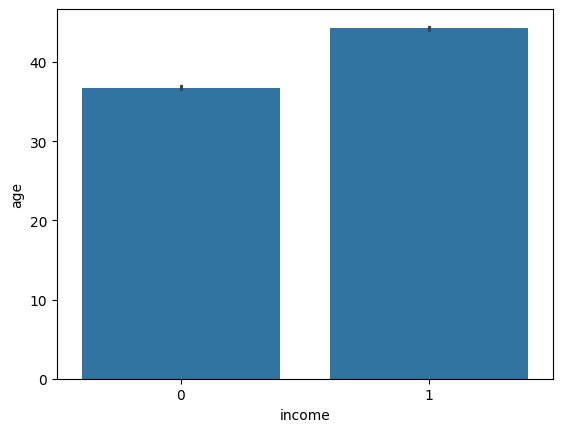

In [15]:
sns.barplot(x = 'income', y = 'age', data = Ad)

<Axes: >

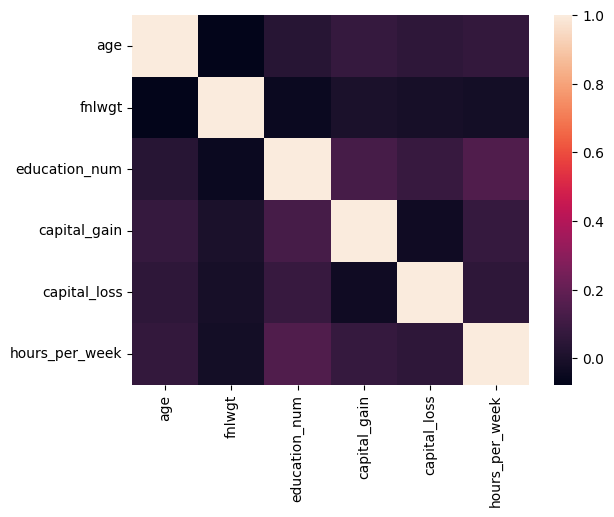

In [16]:
sns.heatmap(Ad_Data.corr())

In [17]:
X = Ad.drop(['income'],axis = 1)
y = Ad['income']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [19]:
print('Shape of X =', X.shape)
print('Shape of y =', y.shape)

Shape of X = (32561, 14)
Shape of y = (32561,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [21]:
 from sklearn.naive_bayes import GaussianNB

In [22]:
# Instantiate Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4942
           1       0.67      0.32      0.44      1571

    accuracy                           0.80      6513
   macro avg       0.74      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513

[[4698  244]
 [1065  506]]
79.90173499155534
